<a href="https://colab.research.google.com/github/Vishal1711/Deep-Learning-/blob/main/MNIST_Deep_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [125]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from keras.utils.np_utils import to_categorical
import random

In [126]:
np.random.seed(0)

In [127]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print(X_train.shape) 
print(X_test.shape) 

(60000, 28, 28)
(10000, 28, 28)


In [128]:
assert(X_train.shape[0] == y_train.shape[0]), "The Number of images is not equal to number of labels."
assert(X_test.shape[0] == y_test.shape[0]), "The Number of images is not equal to number of labels."
assert(X_train.shape[1:] == (28,28)), "The dimension of images is not 28X28."
assert(X_test.shape[1:] == (28,28)), "The dimension of images is not 28X28."

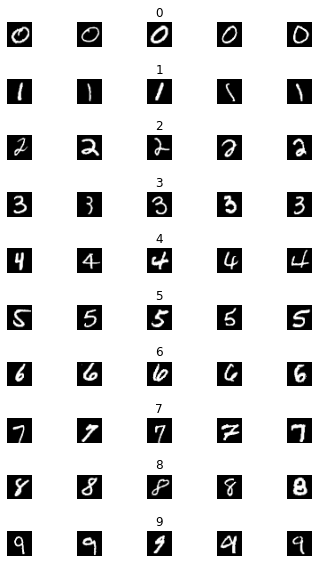

In [129]:
num_of_samples = []
 
cols = 5
num_classes = 10
 
fig, axs = plt.subplots(nrows=num_classes, ncols = cols, figsize=(5, 8))
fig.tight_layout()
for i in range(cols):
    for j in range(num_classes):
        x_selected = X_train[y_train == j]
        axs[j][i].imshow(x_selected[random.randint(0, len(x_selected - 1)), :, :], cmap=plt.get_cmap("gray"))
        axs[j][i].axis("off")
        if i ==2:
          axs[j][i].set_title(str(j))
          num_of_samples.append(len(x_selected))

[5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]


Text(0, 0.5, 'Number of Images')

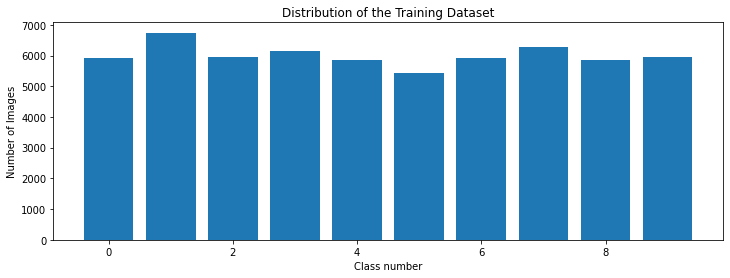

In [130]:
print(num_of_samples)
plt.figure(figsize=(12, 4))
plt.bar(range(0, num_classes), num_of_samples)
plt.title("Distribution of the Training Dataset")
plt.xlabel("Class number")
plt.ylabel("Number of Images")

In [131]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)
X_train = X_train/255
X_test = X_test/255

In [132]:
num_pixels = 784
X_train = X_train.reshape(X_train.shape[0], num_pixels)
X_test = X_test.reshape(X_test.shape[0], num_pixels)

In [133]:
def create_model():
    model = Sequential()
    model.add(Dense(10, input_dim=num_pixels, activation='relu'))
    model.add(Dense(10, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(Adam(lr=0.01), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [134]:
model = create_model()
print(model.summary())

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_22 (Dense)            (None, 10)                7850      
                                                                 
 dense_23 (Dense)            (None, 10)                110       
                                                                 
 dense_24 (Dense)            (None, 10)                110       
                                                                 
Total params: 8,070
Trainable params: 8,070
Non-trainable params: 0
_________________________________________________________________
None


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [135]:
history = model.fit(X_train, y_train, validation_split=0.1, epochs = 10, batch_size = 200, verbose = 1, shuffle = 1)

Epoch 1/10
270/270 [==============================] - 2s 6ms/step - loss: 0.7176 - accuracy: 0.7680 - val_loss: 0.3449 - val_accuracy: 0.8985
Epoch 2/10
270/270 [==============================] - 1s 5ms/step - loss: 0.3748 - accuracy: 0.8904 - val_loss: 0.2702 - val_accuracy: 0.9175
Epoch 3/10
270/270 [==============================] - 1s 5ms/step - loss: 0.3320 - accuracy: 0.9028 - val_loss: 0.2734 - val_accuracy: 0.9178
Epoch 4/10
270/270 [==============================] - 1s 5ms/step - loss: 0.3215 - accuracy: 0.9044 - val_loss: 0.2561 - val_accuracy: 0.9228
Epoch 5/10
270/270 [==============================] - 1s 5ms/step - loss: 0.3010 - accuracy: 0.9111 - val_loss: 0.2643 - val_accuracy: 0.9183
Epoch 6/10
270/270 [==============================] - 1s 4ms/step - loss: 0.2944 - accuracy: 0.9128 - val_loss: 0.2525 - val_accuracy: 0.9263
Epoch 7/10
270/270 [==============================] - 1s 5ms/step - loss: 0.2926 - accuracy: 0.9119 - val_loss: 0.2593 - val_accuracy: 0.9218
Epoch 

Text(0.5, 0, 'epoch')

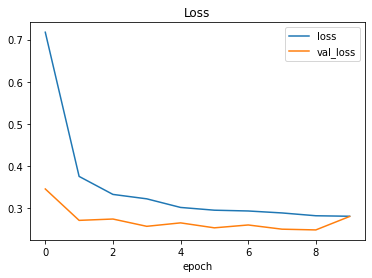

In [136]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.title('Loss')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

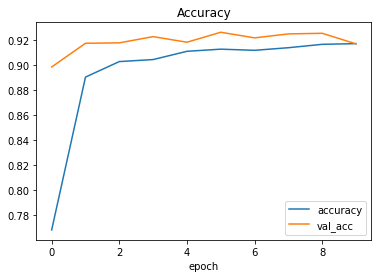

In [137]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['accuracy', 'val_acc'])
plt.title('Accuracy')
plt.xlabel('epoch')

In [138]:
score = model.evaluate(X_test, y_test, verbose=0)
print(type(score))
print('Test score:', score[0])
print('Test accuracy:', score[1])

<class 'list'>
Test score: 0.3238278031349182
Test accuracy: 0.9041000008583069
